In [ ]:
from math import sqrt

import torch
import torch.nn.functional as F

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from gaussian_target_3D import gaussian2D

In [ ]:
h = gaussian2D(radius=10, sigma=1)

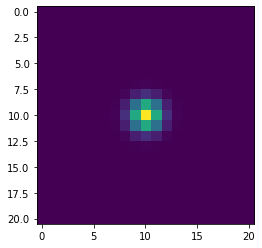

In [ ]:
plt.imshow(h)

In [ ]:
def gaussian3D(radius, sigma=1, dtype=torch.float32, device='cpu'):
    """Generate 3D gaussian kernel.

    Args:
        radius (int): Radius of gaussian kernel.
        sigma (int): Sigma of gaussian function. Default: 1.
        dtype (torch.dtype): Dtype of gaussian tensor. Default: torch.float32.
        device (str): Device of gaussian tensor. Default: 'cpu'.

    Returns:
        h (Tensor): Gaussian kernel with a
            ``(2 * radius + 1) * (2 * radius + 1)`` shape.
    """
    x = torch.arange(
        -radius, radius + 1, dtype=dtype, device=device).view(-1, 1, 1)
    y = torch.arange(
        -radius, radius + 1, dtype=dtype, device=device).view(1, -1, 1)
    z = torch.arange(
        -radius, radius + 1, dtype=dtype, device=device).view(1, 1, -1)


    h = (-(x * x + y * y + z * z) / (2 * sigma * sigma)).exp()

    h[h < torch.finfo(h.dtype).eps * h.max()] = 0
    return h

In [ ]:
h3d = gaussian3D(radius=10, sigma=1)

In [ ]:
h3d.shape

torch.Size([21, 21, 21])

/tmp/ipykernel_36622/3121826184.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


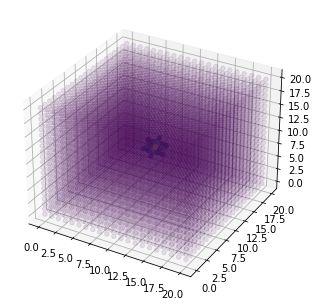

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
x = np.arange(0,21,1)
y = np.arange(0,21,1)
z = np.arange(0,21,1)

x,y,z = np.meshgrid(x,y,z)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x,y,z,c=h3d[x,y,z], alpha=0.1)
mask = h3d[x,y,z] > 0.3
fg_x = x[mask]
fg_y = y[mask]
fg_z = z[mask]
ax.scatter(fg_x,fg_y,fg_z,c=h3d[fg_x,fg_y,fg_z], alpha=0.5)

In [1]:
import torch
from gaussian_target_3D import vis, gen_gaussian_3D_target

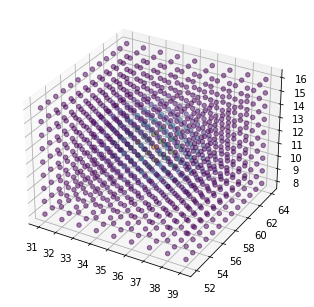

In [3]:
heatmap_3d = torch.zeros([1, 3, 30, 70, 80])
# 35(cx) 对应 70(w), 12(cy) 对应 30(h)
gen_gaussian_3D_target(heatmap_3d[0, 0], center=[35, 12, 26], radius=4)
vis(heatmap_3d[0, 0])